In [1]:
import os
import pickle
from glob import glob
import numpy as np
import torch
import pandas as pd
from fsl.data.image import Image
from fsl.utils.image.resample import resampleToPixdims
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
def get_array(df,col):
    return df.loc[:][col].values

def stats_calc(df,col):
    arr = get_array(df,col)
    return np.min(arr), np.max(arr), np.mean(arr), np.median(arr), np.std(arr)

def plot_hist(df, col, title=None):
    array = get_array(df, col)
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')
    ax.hist(array, bins=50, color='blue', alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
#     plt.title(title)
    fig.patch.set_facecolor('xkcd:white')
    _,_,mean,_,std = stats_calc(df, col)
    if col == 'min':
        thr = mean - 2 * std
    elif col=='max':
        thr = mean + 2 * std
    if col == 'min' or col =='max':
        ax.axvline(x=thr, color='r', linestyle='dashed', linewidth=2)
    else:
        ax.axvline(x=mean, color='r', linestyle='dashed', linewidth=2)
#     plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, facecolor='none', bbox_inches="tight")

def plot_bars(df, labels_list, title=None):
    array_list = get_array(df,labels_list)
#     fig = plt.figure(figsize=(8,6))
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.set_title(title)
    ax.grid(axis='y', alpha = 0.75)
    ax.boxplot(array_list)
    ax.set_xticklabels(labels_list)
    # ax.set_xticklabels(['0', '1', '2','3','4','5', '25', '50', '75','95', '96', '97','98','99', '100'])
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.grid(axis='y', alpha = 0.75)
    fig.patch.set_facecolor('xkcd:white')
    # plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, facecolor='none', bbox_inches="tight")
#     plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+' UKBB'+'.png')

In [3]:
interesting_data_paths = [

# "T1_brain_to_MNI.pkl",
# "T1_brain_to_MNI_linear.pkl",
# "tractsNormSummed.pkl",
# "T1_GM_to_template_GM_mod.pkl",
# "T2_FLAIR_brain_to_MNI.pkl",
# "T2star_to_MNI.pkl",
    
"dr_stage2_0.pkl",
# "dr_stage2_1.pkl",
# "dr_stage2_2.pkl",
# "dr_stage2_3.pkl",
# "dr_stage2_4.pkl",
# "dr_stage2_5.pkl",
# "dr_stage2_6.pkl",
# "dr_stage2_7.pkl",
# "dr_stage2_8.pkl",
# "dr_stage2_9.pkl",
# "dr_stage2_10.pkl",
# "dr_stage2_11.pkl",
# "dr_stage2_12.pkl",
# "dr_stage2_13.pkl",
# "dr_stage2_14.pkl",
# "dr_stage2_15.pkl",
# "dr_stage2_16.pkl",
# "dr_stage2_17.pkl",
# "dr_stage2_18.pkl",
# "dr_stage2_19.pkl",
# "dr_stage2_20.pkl",
# "dr_stage2_21.pkl",
# "dr_stage2_22.pkl",
# "dr_stage2_23.pkl",
# "dr_stage2_24.pkl",
    
# "zstat1.pkl",
# "zstat2.pkl",
# "zstat5.pkl",
    
# "cope1.pkl",
# "cope2.pkl",
# "cope5.pkl",
    
# "all_FA_skeletonised.pkl",
# "all_ICVF_skeletonised.pkl",
# "all_ISOVF_skeletonised.pkl",
# "all_L1_skeletonised.pkl",
# "all_L2_skeletonised.pkl",
# "all_L3_skeletonised.pkl",
# "all_MD_skeletonised.pkl",
# "all_MO_skeletonised.pkl",
# "all_OD_skeletonised.pkl",
    
# "all_FA.pkl",
# "all_ICVF.pkl",
# "all_ISOVF.pkl",
# "all_L1.pkl",
# "all_L2.pkl",
# "all_L3.pkl",
# "all_MD.pkl",
# "all_MO.pkl",
# "all_OD.pkl",

# "T1_to_MNI_warp_jac.pkl",
# "final_mask_to_MNI.pkl",
    
]

In [4]:
path = interesting_data_paths[0]
print(path)
data = pd.read_pickle(path)
data.head()

dr_stage2_0.pkl


,min,max,mean,med,std,1p,25p,75p,99p,norm99p
23425368,-6.016004,10.679828,0.079340,0.0,0.791805,-2.289641,0.0,0.0,3.094288,39.000525
22943860,-10.069695,12.330223,0.005177,0.0,1.019458,-3.417824,0.0,0.0,3.644694,704.075547
24837551,-11.614518,18.476683,0.128012,0.0,1.113610,-2.940036,0.0,0.0,4.385735,34.260280
25243303,-11.060888,15.119335,0.093100,0.0,0.887128,-2.378486,0.0,0.0,3.435811,36.904400
31722154,-10.044186,18.354858,0.135994,0.0,1.129336,-2.836713,0.0,0.0,4.689444,34.482695


In [5]:
print('Stats (min, max, mean, med, std) for MIN: ', stats_calc(data, 'min'))
print('Stats (min, max, mean, med, std) for MAX: ', stats_calc(data, 'max'))
print('Stats (min, max, mean, med, std) for NORM99p: ', stats_calc(data, 'norm99p'))

Stats (min, max, mean, med, std) for MIN:  (-19.019384384155273, -5.117506504058838, -9.881069108941952, -9.71066665649414, 1.92605343285917)
Stats (min, max, mean, med, std) for MAX:  (6.497604846954346, 26.29371452331543, 15.298549820707475, 15.264695167541504, 2.71481147490273)
Stats (min, max, mean, med, std) for NORM99p:  (19.41767692565918, 18340.17578124997, 54.5364748260884, 41.74342834472655, 186.13835131050334)


In [6]:
_,_,mean,_,std = stats_calc(data, 'min')
print(mean-2*std)
_,_,mean,_,std = stats_calc(data, 'max')
print(mean+2*std)

-13.733175974660293
20.728172770512934


/var/folders/kd/38xskn4d5qgfpsl_d52vy51m0000gr/T/ipykernel_5914/24011020.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')


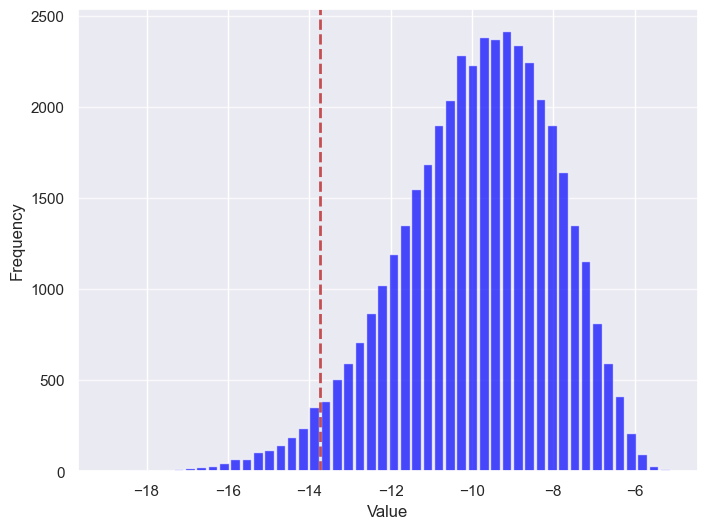

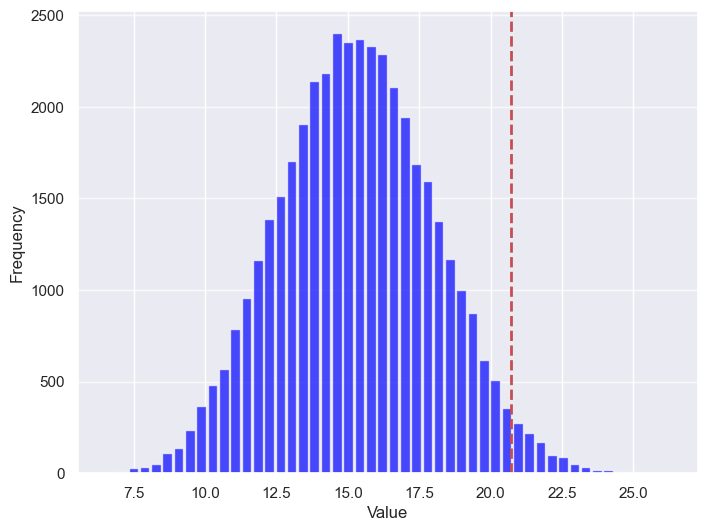

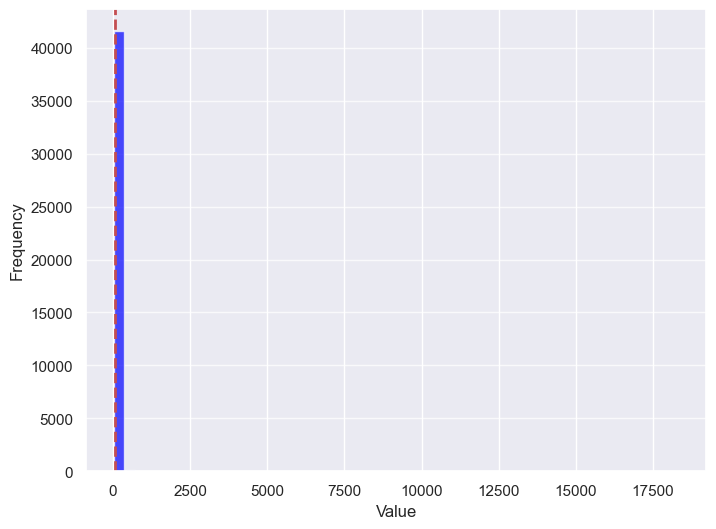

In [7]:
plot_hist(data, 'min', title='misc')
plot_hist(data, 'max', title='misc')
plot_hist(data, 'norm99p', title='misc')

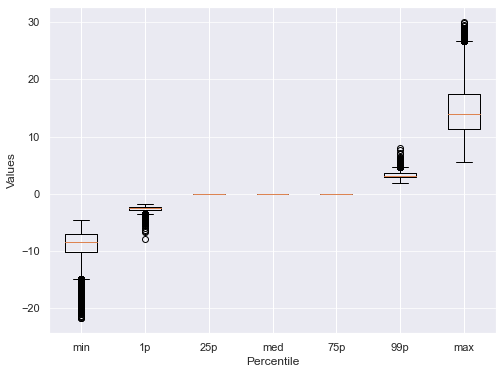

In [8]:
plot_bars(data, ['min', '1p', '25p', 'med', '75p','99p', 'max'], 'vbm_Voxel_Intensity_Value_Distribution')

In [9]:
data['min_corrected'] = data['min'] / data['mean']
data['max_corrected'] = data['max'] / data['mean']

In [10]:
# plot_hist(data, 'min_corrected', title='misc')
# plot_hist(data, 'max_corrected', title='misc')

In [11]:
data['min_norm'] = data['min_corrected'] / np.mean(data['norm99p'])
data['max_norm'] = data['max_corrected'] / np.mean(data['norm99p'])

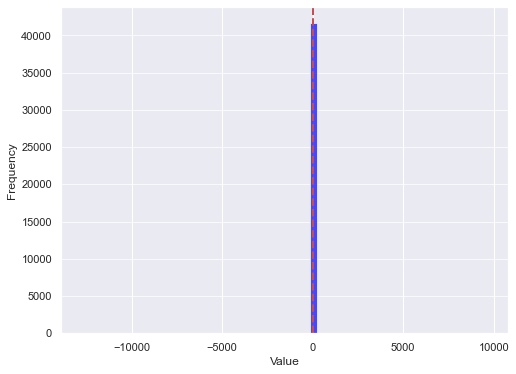

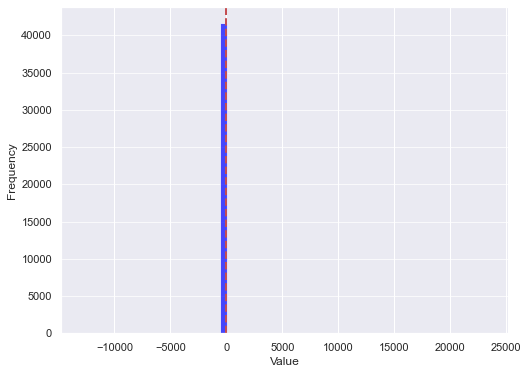

In [12]:
plot_hist(data, 'min_norm', title='misc')
plot_hist(data, 'max_norm', title='misc')

In [13]:
min_scale = data['min'].mean() - data['min'].std()*2
max_scale = data['max'].mean() + data['max'].std()*2
data_scale = max(abs(min_scale), abs(max_scale))
print(data_scale)

data['min_scaled'] = data['min'] / data_scale
data['max_scaled'] = data['max'] / data_scale

22.86463908488348


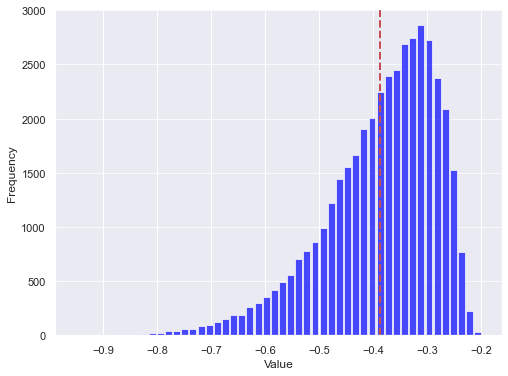

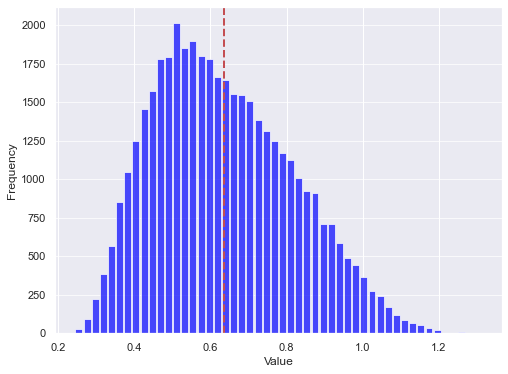

In [14]:
plot_hist(data, 'min_scaled', title='misc')
plot_hist(data, 'max_scaled', title='misc')